## Task 1: Exploratory Data Analytics
### Data Collection

In [72]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt    #For plotting.


train_df = pd.read_csv("train.csv")            #Can include stop words here

def extract_features(fitting_var):
    cv_all_articles = CountVectorizer(min_df=0.20)
    cv_all_articles.fit(fitting_var)
    vec = cv_all_articles.transform(fitting_var)
    matrix = vec.toarray()              #Each row an article, each column a word.
    word_bank = cv_all_articles.get_feature_names_out()
    frequencies = matrix.sum(axis=0)    #Each column represents the frequency of a word in our articles
    return matrix, word_bank, frequencies, cv_all_articles


y = train_df["Category"].to_numpy()
unique_classes = np.unique(y)
print("Unique classes:", unique_classes)

# print(matrix)
# print(word_bank)
# print(frequencies)



Unique classes: ['entertainment' 'tech']


### Task 1 A
#### Report number of articles, number of extracted features and 5 example articles

In [73]:
# Now get five example articles (Q1 a))

X, whole_word_bank, whole_frequencies, cv = extract_features(train_df['Text'])

print("Number of articles: ", X.shape[0])
print("Number of features: ", X.shape[1])

for i in range(5):
    matrix, word_bank, frequencies, vectoriser = extract_features([train_df['Text'][i]])
    print(f"Article: {i+1} has features \n{word_bank}\n\n")
    print(word_bank.size)
    
    





Number of articles:  428
Number of features:  60
Article: 1 has features 
['000' '14' '2003' '25' '29' '45' 'able' 'across' 'activity' 'advisor'
 'ageing' 'ago' 'almost' 'alone' 'also' 'although' 'always' 'among'
 'analogue' 'another' 'bbc' 'behind' 'better' 'birthdays' 'bjorn' 'bought'
 'camera' 'cameras' 'capture' 'change' 'changed' 'chat' 'children' 'chip'
 'choice' 'consumer' 'consumers' 'contact' 'contrast' 'convenient' 'could'
 'customers' 'depth' 'desire' 'devices' 'diaries' 'diary' 'different'
 'digital' 'divide' 'dr' 'drive' 'dubbed' 'early' 'encouraged' 'end'
 'enterprise' 'equipped' 'ericsson' 'especially' 'europe' 'european'
 'even' 'events' 'everyday' 'exactly' 'example' 'factor' 'far' 'faster'
 'figure' 'film' 'firms' 'fit' 'fits' 'five' 'flop' 'focus' 'form'
 'friends' 'funkier' 'get' 'going' 'good' 'governing' 'governs'
 'gradually' 'groups' 'habits' 'handset' 'handsets' 'hardware' 'help'
 'helps' 'historically' 'holidays' 'however' 'imply' 'industry'
 'innovation' 'inn

### Task 1 B
#### i) Top 50 Frequency plot

[36 35 30 33  5 14 58 29 49 27 57  8  9 15 48 43 39 25 32 24 41 46 50 22
 26 56 10 21 47 52 59 17 45  7 51  0 53 42 54 23  2 11 18 31 55 38 40  3
 28  4]
Rank. word: frequency
1. said: 1357
2. people: 612
3. new: 500
4. one: 479
5. also: 479
6. film: 462
7. year: 442
8. music: 413
9. us: 411
10. mr: 408
11. would: 374
12. best: 361
13. could: 322
14. first: 306
15. uk: 297
16. time: 271
17. show: 271
18. many: 259
19. number: 257
20. make: 253
21. technology: 250
22. tv: 246
23. use: 241
24. like: 239
25. million: 229
26. world: 222
27. digital: 221
28. last: 220
29. two: 217
30. users: 214
31. years: 212
32. get: 198
33. top: 195
34. bbc: 189
35. used: 183
36. 000: 179
37. way: 178
38. three: 173
39. well: 172
40. made: 169
41. 2004: 161
42. director: 155
43. go: 152
44. next: 141
45. work: 141
46. set: 140
47. take: 138
48. according: 138
49. much: 135
50. already: 133


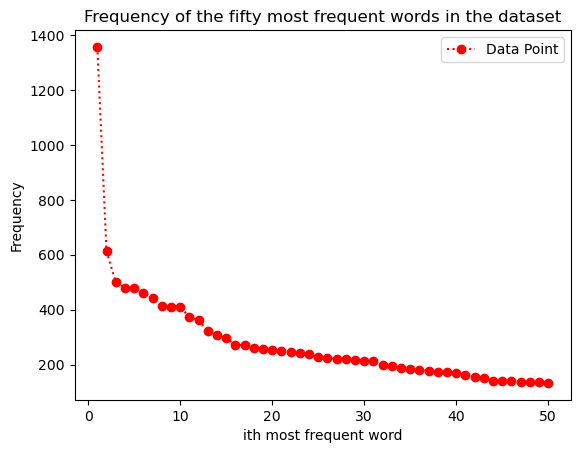

In [74]:
#Get the top 50 terms in the entire dataset
indices_50 = whole_frequencies.argsort()[-50:][::-1] #Get the indices of the top 50 terms
print(indices_50)

top_50_features = whole_word_bank[indices_50] #Get the top 50 features
top_50_feature_frequencies = whole_frequencies[indices_50] #Get the frequencies of the top 50 features

print("Rank. word: frequency")
for i in range(top_50_features.size):
    print(f"{i+1}. {top_50_features[i]}: {top_50_feature_frequencies[i]}") #Print the top 50 features and their frequencies

#Now we can plot the top 50 features with their frequencies
plt.plot()

plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", label="Data Point")
plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset")
plt.show()

#### ii) Frequency distribution for features for each class

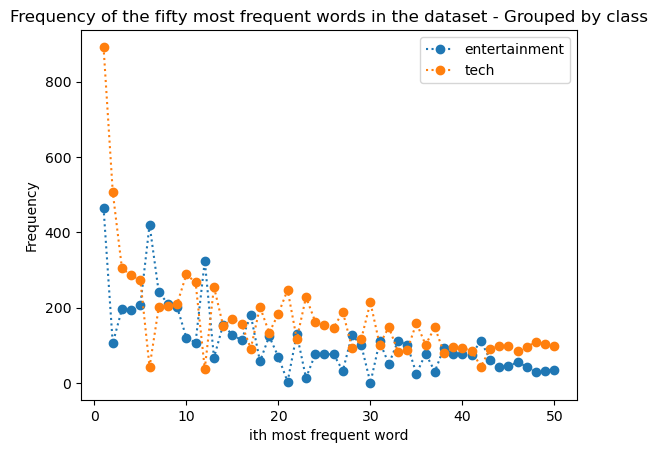

In [75]:
# code for task 1 b/ii
# Assuming this is using the above words, and getting their frequencies for each class



# Get the frequencies of the top 50 features for each class

plt.plot()

for class_name in unique_classes:
    #Get indices (Rows) of the matrix which corresonds to current class
    class_indices = np.where(y == class_name)[0]
    #Now get the frequencies of the top 50 features for this class
    class_frequencies_ii = X[class_indices][:, indices_50].sum(axis=0) # Sum the frequencies of the correct rows and columns
    plt.plot([i+1 for i in range(50)], class_frequencies_ii, linestyle=':', marker='o', label=class_name)

plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
# plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", alpha=0.4, label="Data Point") Overlay plot i)
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset - Grouped by class")
plt.show()
        


#### iii) Class distribution - plot frequency of classes.

216 212


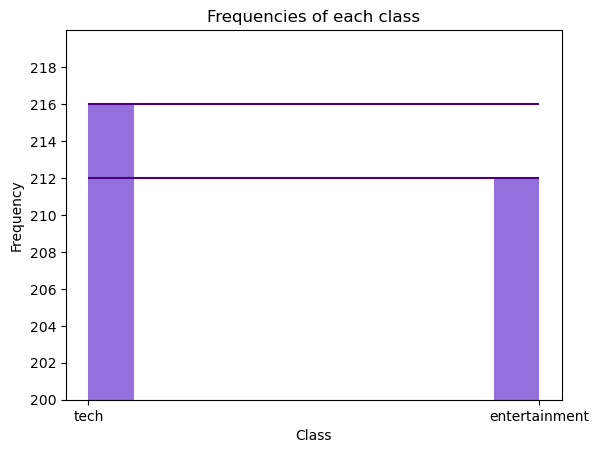

In [76]:
# code for task 1 b/iii
plt.hist(y, color="mediumpurple")
print(np.count_nonzero(y[y == "tech"]), np.count_nonzero(y[y == "entertainment"]))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequencies of each class")
plt.yticks(np.arange(0,220, step=2))
plt.ylim(200, 220)
plt.hlines(216, xmin=0, xmax=1, colors="indigo")
plt.hlines(212, xmin=0, xmax=1, colors="indigo")
plt.show()
 

In [77]:
# get test data
test_df = pd.read_csv('test.csv')
test_y = test_df["Category"].to_numpy()
test_X = cv.transform(test_df['Text']).toarray()

print(f"{test_df} \n {test_y} \n {test_X}")

     ArticleId                                               Text  \
0         1821  johnny denise lose passport johnny vaughan den...   
1          522  bt offers free net phone calls bt offering cus...   
2          636  power people says hp digital revolution focuse...   
3          170  stars gear bafta ceremony film stars across gl...   
4           85  controversial film tops festival controversial...   
..         ...                                                ...   
101       1904  beastie boys win sampling battle us rappers be...   
102        857  double eviction big brother model caprice holb...   
103        325  dj double act revamp chart show dj duo jk joel...   
104       1587  apple ipod family expands market apple expande...   
105        538  santy worm makes unwelcome visit thousands web...   

          Category  
0    entertainment  
1             tech  
2             tech  
3    entertainment  
4    entertainment  
..             ...  
101  entertainment  
102

## Task 2: Classification Models Learning
### Task 2 A
#### Naive Bayes Classifier
#### i) Report top 20 most identifiable words that are most likely to occur in the articles over two classes

In [78]:
# code for task 2 a/i

#### ii) Report the top 20 words that maximise the the probability quantity P(Xw = 1|Y = y)/P(Xw = 1| Y != y). Which list of words describe the 2 classes better?

In [79]:
# code for task 2 a/ii

### Task 2 B
#### K-Nearest Neighbours Classifier
#### Report surface plot of the kNN with your choice of hyperparameters k and distance metric. Explain the impact of k and the distance metric on the decision boundary.

In [80]:
# code for task 2 b
# for surface plots check note on assignment pdf at bottom of task 2

### Task 2 C
#### Support Vector Machines
#### i) Soft margin linear kernel SVM
#### Report surface plot and explain the impact of the penalty C hyperparameter

In [81]:
# code for task 2 C soft margin linear kernel svm
# for surface plots check note on assignment pdf at bottom of task 2

#### ii) Hard margin RBF kernel SVM
#### Report surface plot and explain the impact of the kernel width hyperparameter


Our chosen C value is 10 Billion. We chose this as having such a high misclassification penalty gives a hard margin boundary. And our kernel width hyperparameter is 1 / number of features, so for our dataset this is 1/60. Having a small kernel width makes our boundary fit to the dataset more. 

In [82]:
# code for task 2 C hard margin rbf kernel svm
# for surface plots check note on assignment pdf at bottom of task 2

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# create hard margin rbf SVM, high C for hard margin
# gamma is kernel width, auto sets to 1/# of features
rbf = SVC(kernel='rbf', C=1e10, gamma='auto')
rbf.fit(X, y)

SVC(C=10000000000.0, gamma='auto')

making pca
Label encoder
Fitting train
Predicting
Splitting into x, y
Determining grid
Predicting grid
Getting misclassified


ValueError: Invalid RGBA argument: 1

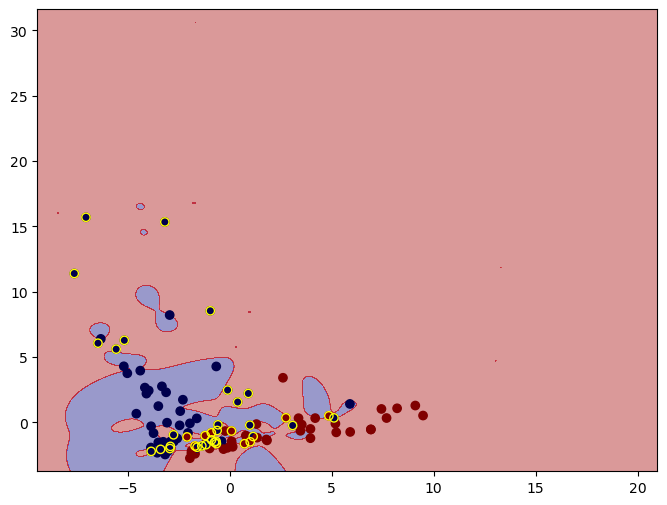

In [ ]:
# Plot for ii)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


#Do PCA so we only have two dimensions
print("making pca")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
test_x_pca = pca.transform(test_X)

#Convert our y vector to binary (tech, entertainment) --> (1,0)
print("Label encoder")
le = LabelEncoder()
y_encoded = le.fit_transform(y)
test_y_encoded = le.transform(test_y)               #entertainment 0, tech 1

#Now we fit our pca points to an rbf kernel model
print("Fitting train")
rbf_pca = SVC(kernel='rbf', C=1e10, gamma='auto')
rbf_pca.fit(X_pca, y_encoded)



#Now predict our values
print("Predicting")
pred = rbf_pca.predict(test_x_pca)
color_assignment = test_y_encoded


#Split x and y values to plot our data points
print("Splitting into x, y")
# x = test_x_pca[:, 0]
# y = test_x_pca[:, 1]
x = X_pca[:, 0]
y = X_pca[:, 1]

#Create the mesh, this allows for our contour to show the regions/boundaries for tech and entertainment.
print("Determining grid")
x_min, x_max = x.min() -  1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict to determine the regions and boundaries.
print("Predicting grid")
Z = rbf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Allows for highlighting of misclassified points.
print("Getting misclassified")
misclassified = (pred != test_y_encoded) # identify misclassified points


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='seismic')  # Decision boundary/region


# print(test_x_pca[0,0], test_x_pca[0, 1], color_assignment[0])


plt.scatter(test_x_pca[:, 0], test_x_pca[:, 1], c=color_assignment, cmap='seismic', label="Testing Data")     #Blue is Entertainment, Tech is 1
plt.scatter(test_x_pca[misclassified, 0], test_x_pca[misclassified, 1], edgecolors='yellow', facecolors='none', label='Misclassified')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='seismic', alpha=0.2, label="Training Data")
plt.legend()
plt.title("Hard margin RBF Kernel, where Red is Tech articles.")
plt.xlim(x_min, 11)
plt.ylim(y_min, 17)
plt.show()

### Task 2 D
#### Neural Network
#### add more details later

In [ ]:
# code for task 2 D neural network

## Task 3: Classification Quality Evaluation
### Hard margin RBF kernel SVM
#### Task 3 A
#### i) Plot for training accuracy as F1 measure (y axis) for each m value (x axis)
#### ii) Plot for testing accuracy as F1 measure (y axis) for each m value (x axis)

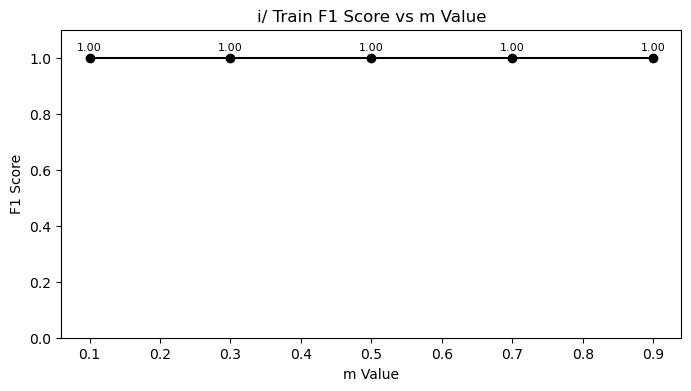

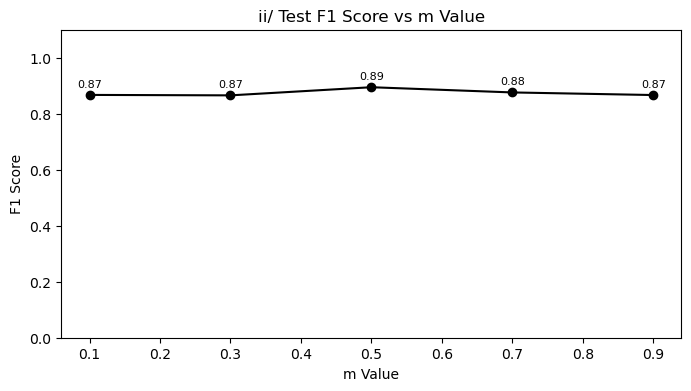

In [ ]:
from sklearn.metrics import f1_score

test_df = pd.read_csv('test.csv')
y_test = test_df["Category"].to_numpy()

y = train_df["Category"].to_numpy()

m_values = [0.1, 0.3, 0.5, 0.7, 0.9]
train_f1_scores = []
test_f1_scores = []
for m in m_values:
    # train a model on the subset of the training data
    rows = int(m * y.size)
    y_subset = y[0: rows]
    X_subset, whole_word_bank, whole_frequencies, cv_subset = extract_features(train_df['Text'][0:rows])
    rbf = SVC(kernel='rbf', C=1e10, gamma='auto')
    rbf.fit(X_subset, y_subset)

    # get training accuracy as f1-measure
    y_pred = rbf.predict(X_subset)
    train_f1 = f1_score(y_subset, y_pred, average='macro')
    train_f1_scores.append(train_f1)

    # get testing accuracy as f1-measure
    test_X = cv_subset.transform(test_df['Text']).toarray() # use vectoriser from training to transform data
    y_pred = rbf.predict(test_X)
    test_f1 = f1_score(y_test, y_pred, average='macro')
    test_f1_scores.append(test_f1)

# plot for 3ai: training accuracy f1 score vs m values
plt.figure(figsize=(8, 4))
plt.plot(m_values, train_f1_scores, marker='o', label='Train F1', color='black')
for m, f1 in zip(m_values, train_f1_scores):
    plt.text(m, f1+0.02, f"{f1:.2f}", ha='center', va='bottom', fontsize=8)
plt.ylim(0, 1.1)
plt.xlabel('m Value')
plt.ylabel('F1 Score')
plt.title('i/ Train F1 Score vs m Value')
plt.show()

# plot for 3aii: test accuracy f1 score vs m values
plt.figure(figsize=(8, 4))
plt.plot(m_values, test_f1_scores, marker='o', label='Test F1', color='black')
for m, f1 in zip(m_values, test_f1_scores):
    plt.text(m, f1+0.02, f"{f1:.2f}", ha='center', va='bottom', fontsize=8)
plt.ylim(0, 1.1)
plt.xlabel('m Value')
plt.ylabel('F1 Score')
plt.title('ii/ Test F1 Score vs m Value')
plt.show()


